Load the `ISLR2` and `tidyverse` packages.

In [90]:
library('ISLR2')
library('tidyverse')
library('tidymodels')

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [91]:
?Auto

Auto {ISLR2},R Documentation


In [93]:
Auto |> glimpse()

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

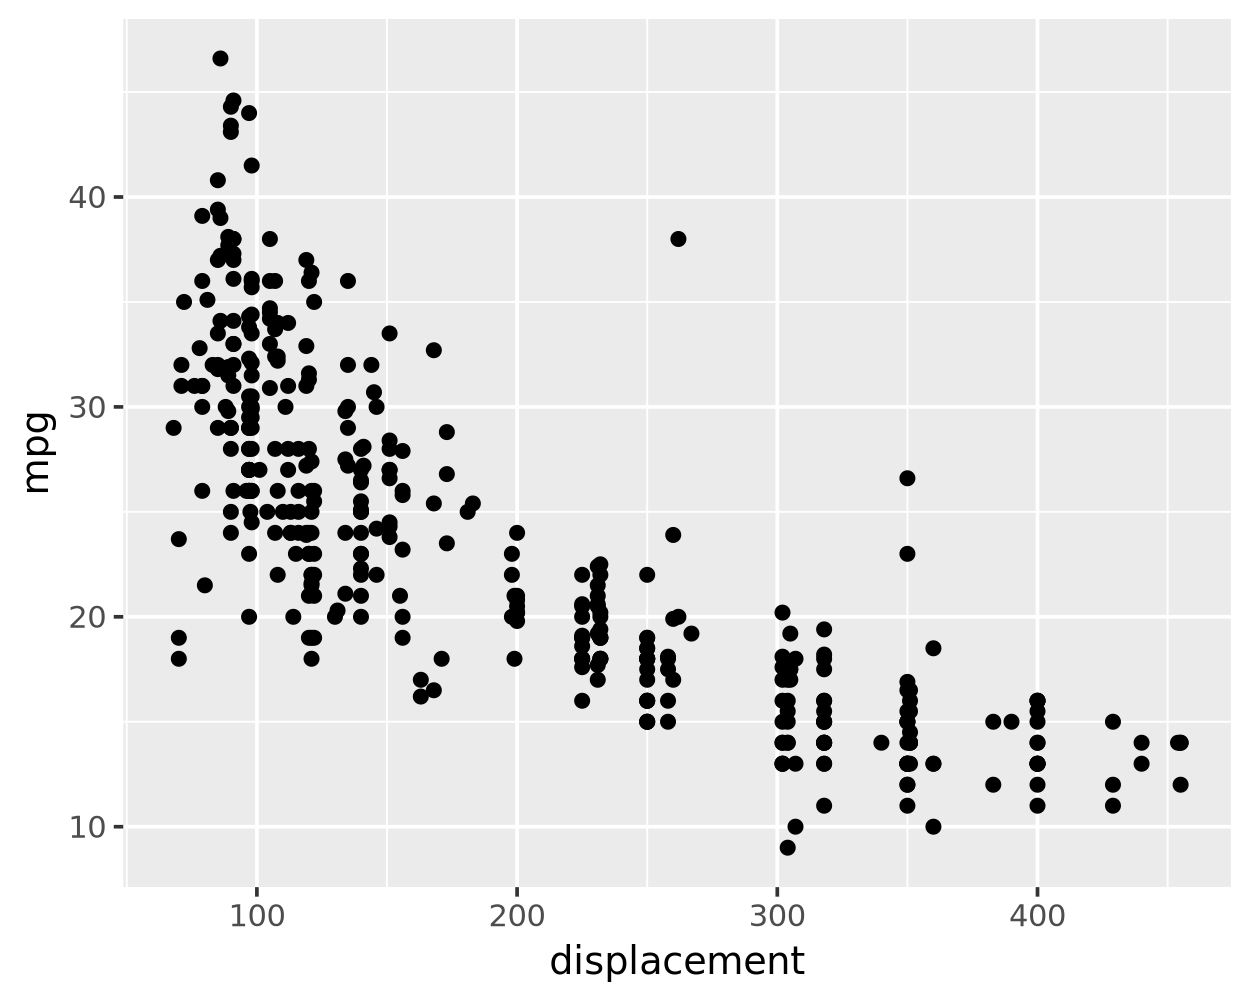

In [94]:
ggplot(Auto, aes(displacement, mpg)) +
    geom_point()

❓Does the relationship of `mpg` to `displacement` look linear?

No, looking at the scatterplot, the relationship between displacement (explanatory variable) and mpg (response variable) doesn't look entirely linear.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

**Spline**

In [95]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_ns(displacement, deg_free = 3) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) |>
    prep()

juice(rec) |> head()

mpg,displacement_ns_1,displacement_ns_2,displacement_ns_3,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0.46190391,0.3589048,0.06739428,0,0,0,1
15,0.35827115,0.3451129,0.25669393,0,0,0,1
18,0.44457364,0.3524473,0.11430298,0,0,0,1
16,0.46540576,0.3610567,0.05480333,0,0,0,1
17,0.46743805,0.3625878,0.04645930,0,0,0,1
15,-0.01194771,0.3771541,0.63418745,0,0,0,1


In [96]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

mod_fit

parsnip model object


Call:
stats::lm(formula = mpg ~ ., data = data)

Coefficients:
      (Intercept)  displacement_ns_1  displacement_ns_2  displacement_ns_3  
            21.32             -13.16             -29.57             -14.61  
       cyl_cat_X4         cyl_cat_X5         cyl_cat_X6         cyl_cat_X8  
            14.42              16.50              13.56              12.15  


In [97]:
glance(mod_fit)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7230675,0.7180192,4.144604,143.2313,6.059312e-103,7,-1109.531,2237.062,2272.803,6596.254,384,392


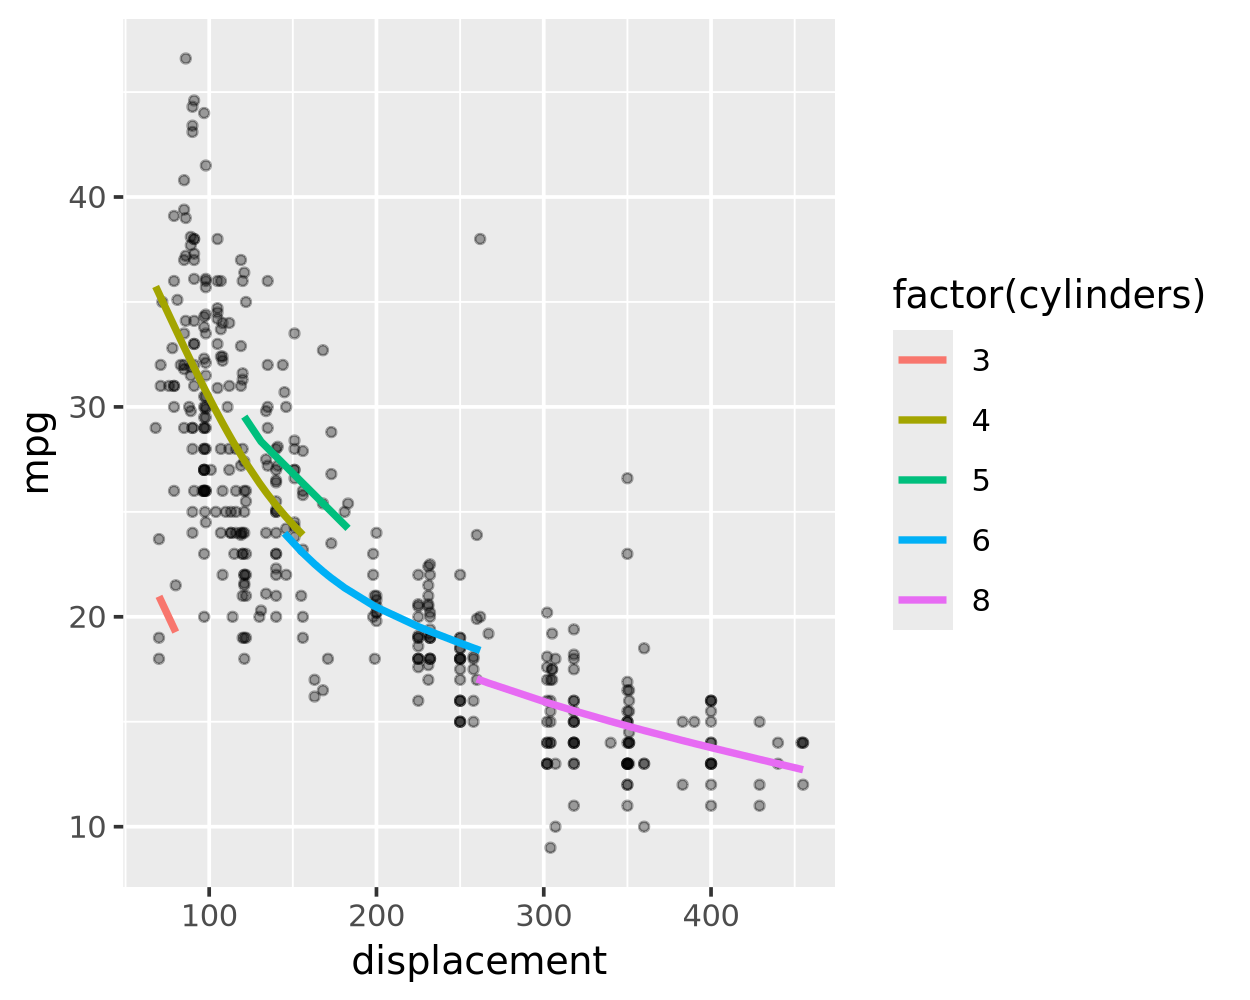

In [98]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

**Polynomial**

In [99]:
rec2 = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_poly(displacement, options = c(raw = TRUE), degree = 3) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) |>
    prep()

juice(rec2) |> head()


Warning message in opts$degree <- x$degree:
“Coercing LHS to a list”


mpg,displacement_poly_1,displacement_poly_2,displacement_poly_3,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,307,94249,28934443,0,0,0,1
15,350,122500,42875000,0,0,0,1
18,318,101124,32157432,0,0,0,1
16,304,92416,28094464,0,0,0,1
17,302,91204,27543608,0,0,0,1
15,429,184041,78953589,0,0,0,1


In [100]:
mod2 = linear_reg() |> set_engine('lm')

mod_fit2 = mod2 |> fit(mpg ~ ., data = rec2 |> juice())

mod_fit2

parsnip model object


Call:
stats::lm(formula = mpg ~ ., data = data)

Coefficients:
        (Intercept)  displacement_poly_1  displacement_poly_2  
          3.649e+01           -2.705e-01            7.487e-04  
displacement_poly_3           cyl_cat_X4           cyl_cat_X5  
         -7.300e-07            1.419e+01            1.627e+01  
         cyl_cat_X6           cyl_cat_X8  
          1.415e+01            1.271e+01  


In [102]:
glance(mod_fit2)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7209212,0.7158338,4.160634,141.7079,2.648363e-102,7,-1111.044,2240.088,2275.83,6647.376,384,392


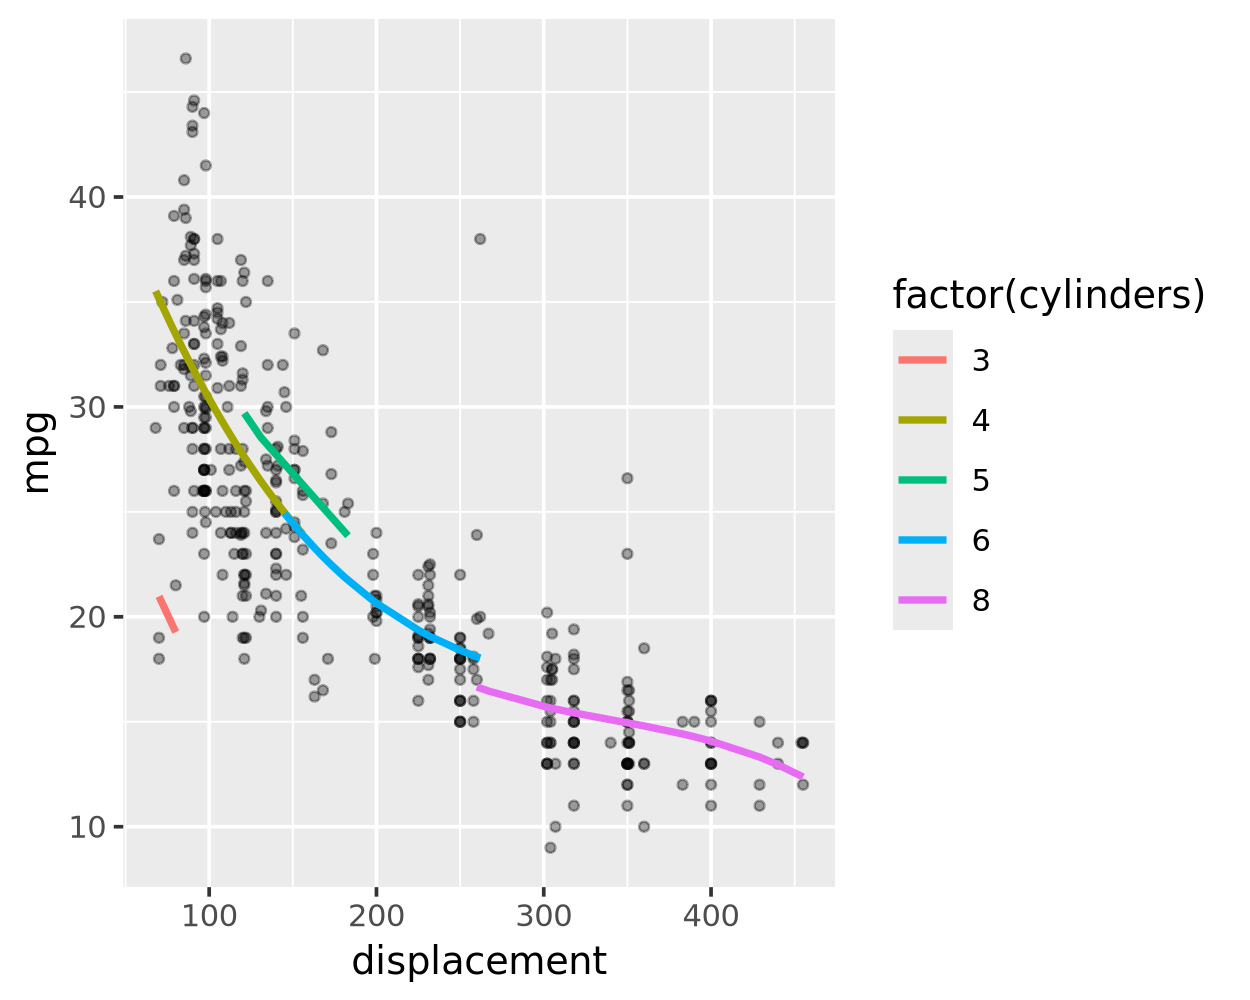

In [103]:
predict(mod_fit2, rec2 |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)